<h1><b>Sales Forecast</b> - Videogames</h1>

<H2>Project Description</H2>

> The given dataset contains information about videogames <b>sales</b> in different <b>regions</b> including platforms such as XBox, PlayStation, PC and more, the information also includes critic score for each game and ESRB score.<br><br>The task is to <b>find out patterns that determine how successful a given game will be</b>, so that the team can rely on these patterns to create more reliable marketing plans next year.

<H2>Dataset Description</H2>

> This dataset contains information about videomames. <br>
* <b>Name</b> - Represents the title of the game
* <b>Platform</b> - Mean the platform it was released for
* <b>Genre</b> - Contains the gender of the game
* <b>Year of Release</b> - Specifies the year in which it was released
* <b>NA Sales</b> - Specifies the income of the game in North America in millions
* <b>EU Sales</b> - "" "" Europe
* <b>JP Sales</b> - "" "" Japan
* <b>Other Sales</b> - Specifies the income of the game in other countries
* <b>Critic Score</b> - From 0 to 100
* <b>User Score</b> - From 0 to 10
* <b>Rating</b> - ESRB rating based in the game content

<h2>Importing Required Libraries</h2>

In [4]:
import pandas as pd # to get useful functions to work with data
import numpy as np # for math computations
import matplotlib.pyplot as plt # for data visualization
from scipy import stats as st

<h2><b>Step 1</b> - Importing data</h2>

<h3>Bring the data to Action</h3>

In [5]:
df = pd.read_csv("/datasets/games.csv")

<h3><b>1.1</b> First look at the dataset</h3>

> Get information about the dataset will help me to spot the issues (if any)

In [6]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


    This dataset has some issues
* Columns' names aren't standarized
* Some columns could have more apropiate data types
* There are missing values

<h2><b>Step 2</b> - Preparing Data</h2>

<h3><b>2.1</b> Correcting Columns' names</h3>

In [8]:
column_names = df.columns # get the columns' names in a list to modify it
column_names = column_names.str.strip() # removing extra epaces at the beggining and at the end
column_names = column_names.str.lower() # replacing capital letters with their lower counterpart
df.columns = column_names # replace names in the df for their corrected version

<H3><b>2.2</b> Filling Missing Values</h3>

In [9]:
df_years = df.groupby('year_of_release')['name'].count()
df_years.describe()

count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64

    The amount of games released increases every year and, this makes me think it wont be useful to fill the missing values with the mean or the median of the whole dataset; Instead I think it would be better to fill the missing values considering the platform it was released for, my idea is:
* filter by platform
* get the average of that platform
* fill missing values of that platform with the correspondin average

In [10]:
platform_years_mean = 0
platform_critics_mean = 0
current_platform = ''

In [11]:
def fill_years(row):
    
    """uses platform_years_mean and current_platform to replace the missing values according to the game platform"""
    
    if pd.notna(row['year_of_release']): # when the year of release is not NaN
        return row # it makes no changes
    
    if row['platform'] != current_platform: # when the game platform and the current platform are not equal
        return row # it makes no changes
    
    # otherwise (when the platforms are equal and the year is NaN)
    row['year_of_release'] = platform_years_mean
    # returns the row with the year_of_release changed
    return row

In [12]:
platforms = df['platform'].unique() # get list of platforms

In [13]:
for platform in platforms:
    current_platform = platform # this assignation is needed to be able to perform fill_years() correctly
    platform_years_mean = df[df['platform'] == platform]['year_of_release'].mean() # this one as well
    df = df.apply(fill_years, axis=1) # filling the missing values in the df for the current platform

In [14]:
def fill_critics(row):
    
    """uses platform_critics_mean and current_platform to fill missing values in critic_score with the respective mean by platform"""
    
    if row['platform'] != current_platform:
        return row
    
    if pd.notna(row['critic_score']): # when the critic_score is not NaN
        return row # it makes no changes
    
    # for games that are from the current_platform and have NaN in critic_score
    row['critic_score'] = platform_critics_mean # updates critic_score
    return row

In [15]:
for platform in platforms:
    current_platform = platform # this assignation is needed to be able to perform fill_years() correctly
    platform_critics_mean = df[df['platform'] == platform]['critic_score'].mean() # this one as well
    if pd.notna(platform_critics_mean):
        platform_critics_mean = platform_critics_mean.round(0)
    df = df.apply(fill_critics, axis=1) # filling the missing values in the df for the current platform

In [16]:
dft = df[df['critic_score'].isna()]
# dft.sample(5)

    After filling the missing values with the mean_critic_score related to their platform, still there are some games without a critic_score, afther a quick revie I noticed that this result is caused by the fact that no games in these platforms have critic_score nor user score or rating.
    Whit this said, I decided to leave this games' critic_score empty

In [17]:
dft = pd.pivot_table(df, values='critic_score', index='platform', columns='genre', aggfunc='mean')
# dft

    By looking at this table I can see that the scores vary if they are filtered by platform or genre, but the scores are more consistent when they are filtered by platform;
    with that said I thik it is a good idea to replace user_score where it says TBD with the critic_score.

In [18]:
def replace_tbd(row):
    
    """replaces tbd in user_score for its critic_score"""
    
    if row['user_score'] == 'tbd' or pd.isna(row['user_score']):
        row['user_score'] = row['critic_score'] / 10
        
    return row['user_score']

In [19]:
df['user_score']  = df.apply(replace_tbd, axis=1)

In [20]:

df['rating'] = df['rating'].fillna('uncategorized') # filling NaN with "uncategorized"
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

<h3><b>2.3</b> Correcting columns' data types</h3>

In [21]:
# change platform, genre and rating column to category
df['platform'] = df['platform'].astype('category')
df['year_of_release'] = df['year_of_release'].astype(int)
df['genre'] = df['genre'].astype('category')
df['rating'] = df['rating'].astype('category')
df['critic_score'] = df['critic_score'].astype(int)
df['user_score'] = pd.to_numeric(df['user_score']) * 10
df['user_score'] = df['user_score'].astype(int)

In [22]:
duplicates = df[df.duplicated()]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


    There are not duplicated games

<h2><b>Step 3</b> - Analysing Data</h2>

In [23]:
def make_color_list(series, ignore_under, highlight_from, colors):
    
    """Creates a list of colors"""
    
    color_list = []
    
    for value in series:
        if value < ignore_under:
            color_list.append(colors[0])
        elif value >= highlight_from:
            color_list.append(colors[2])
        else:
            color_list.append(colors[1])
    return color_list

In [24]:
# Set global configurations for future plots
plt.rcParams['figure.facecolor'] = (0.12, 0.11, 0.13)
plt.rcParams['figure.figsize'] = [20, 10]

plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['axes.titlesize'] = 34
plt.rcParams['axes.titlepad'] = 25
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.facecolor'] = (0.15, 0.14, 0.16)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'white'

plt.rcParams['font.size'] = 14

plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.rcParams['grid.alpha'] = 0.1
plt.rcParams['grid.color'] = 'white'

KeyError: 'legend.labelcolor is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

<h3><b>3.1</b> How many games were released each year?</h3>

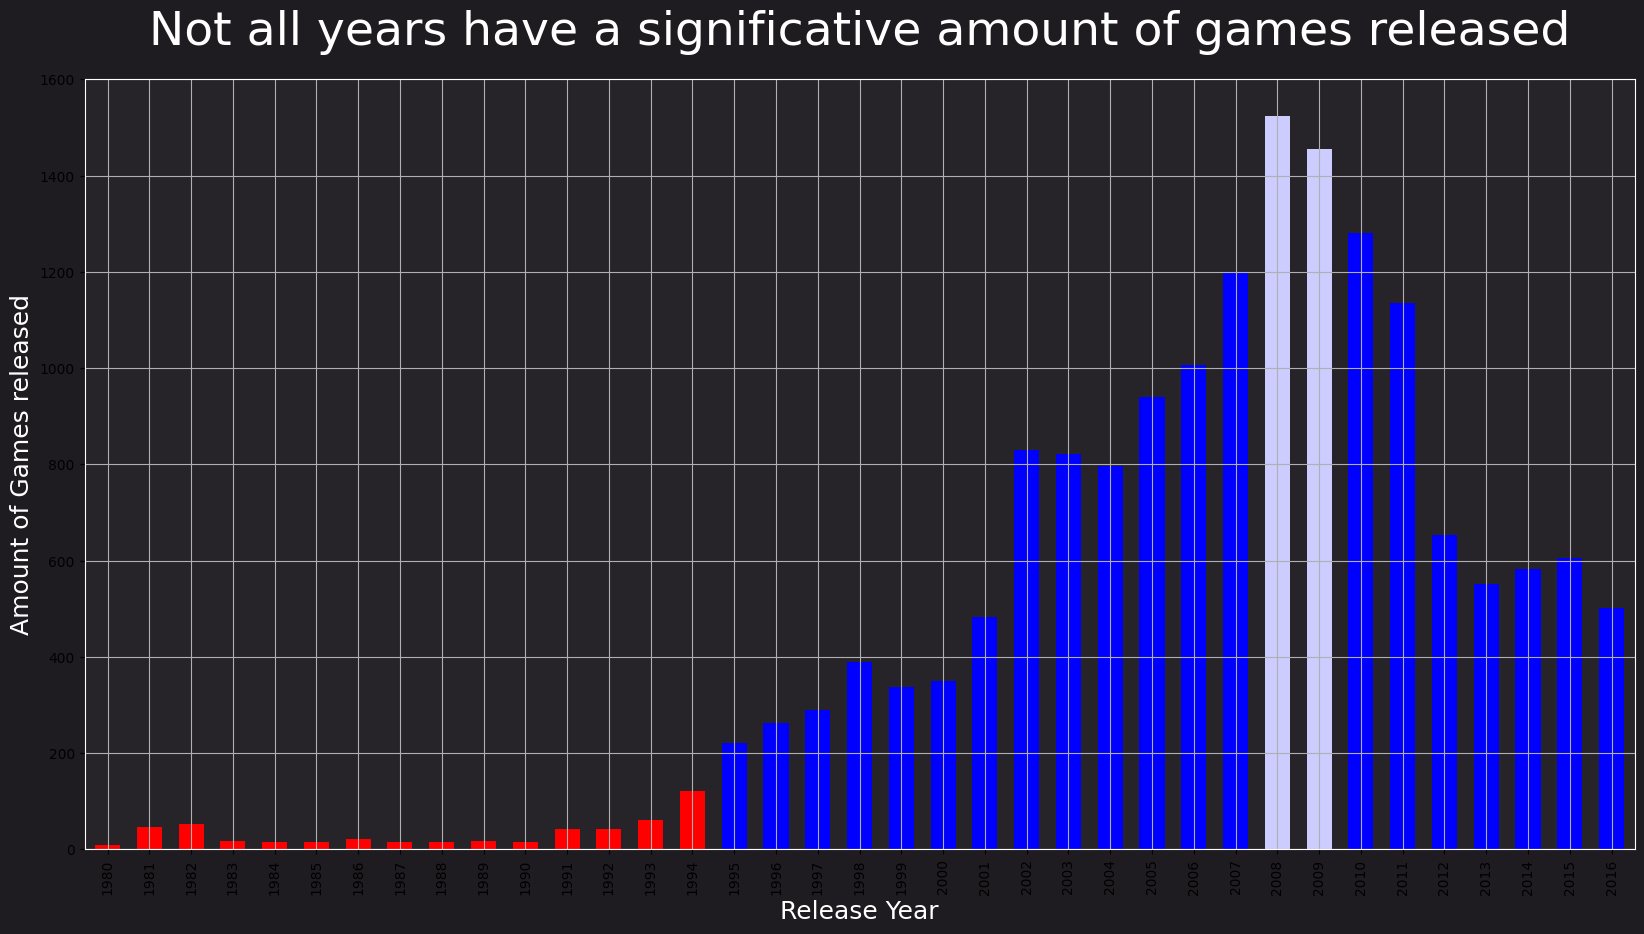

In [25]:
games_released_by_year = df.groupby('year_of_release')['name'].count()
colors = make_color_list(games_released_by_year, 200, 1400, ['red', 'blue', (0.8, 0.8, 1)])
games_released_by_year.plot(kind='bar', title='Not all years have a significative amount of games released', color=colors, width=0.6)
plt.xlabel('Release Year')
plt.ylabel('Amount of Games released')
plt.show()

    Every year from 1980 to 1994 less than 150 games were released by year, not to say that many of those if not all, don't have a critic score, user score nor rating, with this information I consider that not all years have a significative amount of games released

<h3><b>3.2</b> Total incomes per Game / Platform?</h3>

In [26]:
def get_game_total_income(game):
    
    """this function adds the incomes in all regions the game was sold"""
    
    total_income = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']
    return total_income   

In [27]:
# calculates the total income per game
df['total_sales'] = df.apply(get_game_total_income, axis=1)
df = df[['name', 'platform', 'genre', 'year_of_release', 'critic_score', 'user_score', 'rating', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]

In [28]:
dft = df.sort_values(by='year_of_release')

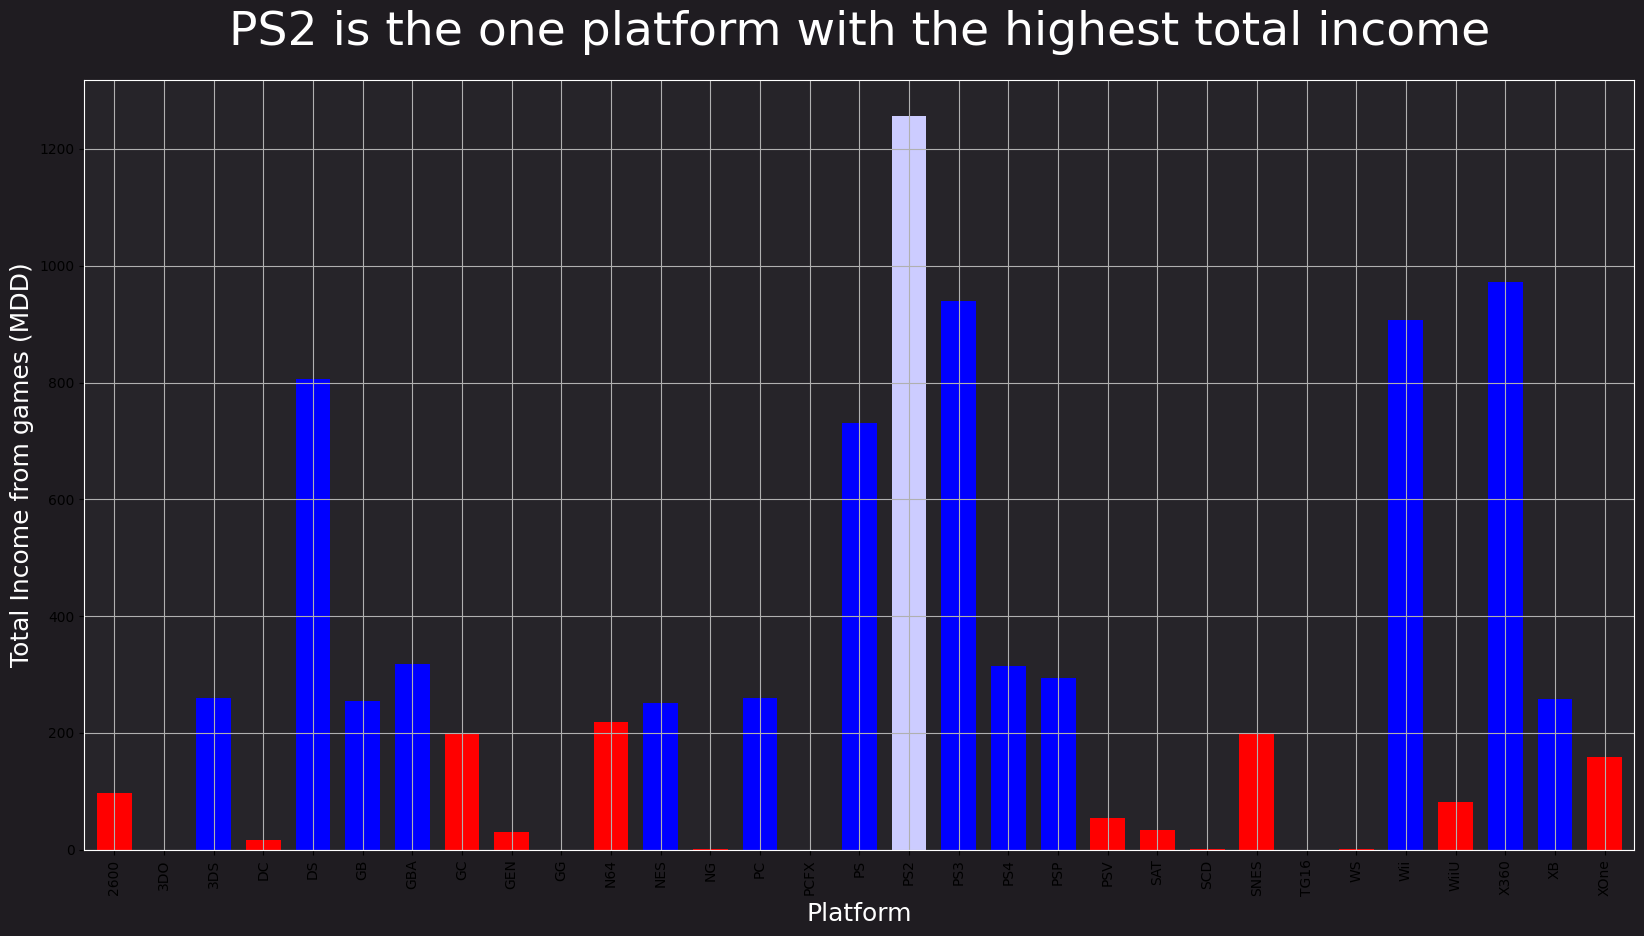

In [29]:
platforms_grouped = dft.groupby('platform')['total_sales'].sum()
platforms_grouped.plot(kind='bar', width=0.7, title='PS2 is the one platform with the highest total income',
                       color=make_color_list(platforms_grouped, 250, 1000, ['red', 'blue', (0.8, 0.8, 1)]))
plt.xlabel('Platform')
plt.ylabel('Total Income from games (MDD)')
plt.show()

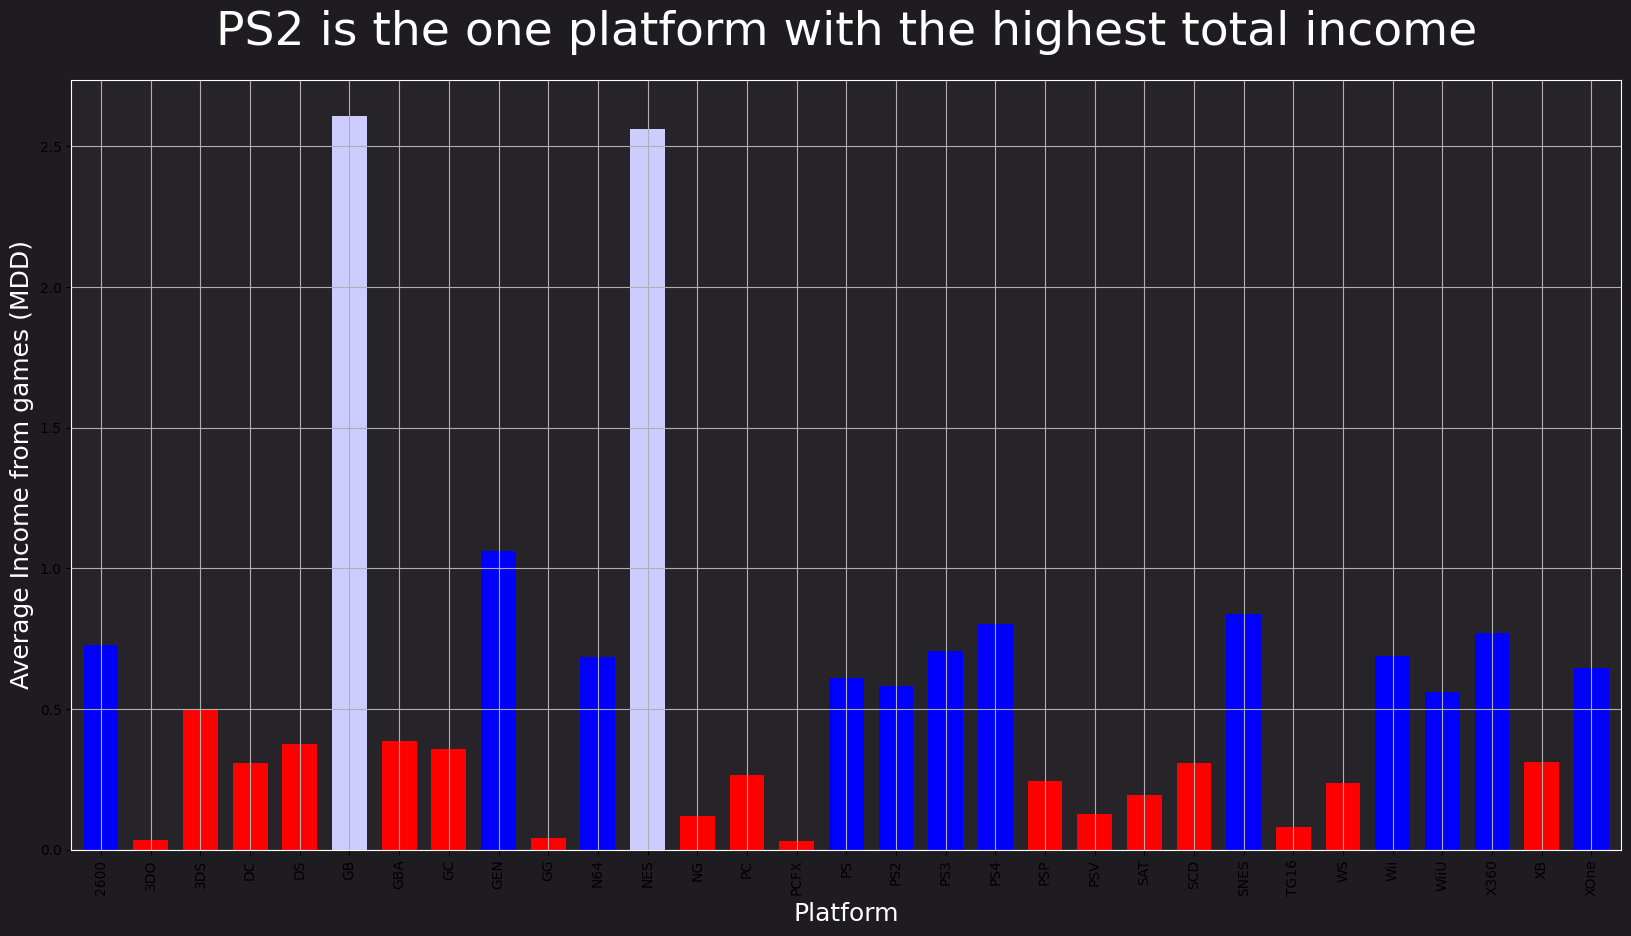

In [30]:
platforms_grouped = dft.groupby('platform')['total_sales'].mean()
platforms_grouped.plot(kind='bar', width=0.7, title='PS2 is the one platform with the highest total income',
                       color=make_color_list(platforms_grouped, 0.5, 2.5, ['red', 'blue', (0.8, 0.8, 1)]))
plt.xlabel('Platform')
plt.ylabel('Average Income from games (MDD)')
plt.show()

    Considering platforms that made 250 MDD or more there are 14 platforms in the table:
    3DS, DS, GB , GBA, NES , PC, PS2, PS3, PS4, PSP, Wii, X360, XB

    Considering platforms that lead when the average income per game is considered:
    2600, GB, GEN, N64, NES, PS, PS2, PS3, PS4, SNES, Wii, WiiU, X360, XOne

    When both parameters are considered the leaderboard is
* GB
* NES
* PS2
* PS3
* PS4
* Wii
* X360

In [31]:
platform_leaderboard_list = ['GB', 'NES', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']
platform_leaderboard_games = pd.pivot_table(df, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
platform_leaderboard_games = platform_leaderboard_games[platform_leaderboard_list]
platform_leaderboard_games = platform_leaderboard_games.replace(0, None)

In [32]:
def first_last_peak(data, index):
    appear_on = []
    plat_peak = []
    last_regi = []
    for col in data:
        serie = data[col]
        serie = serie.dropna()
        appear_on.append(serie.index[0])
        plat_peak.append(serie.idxmax())
        last_regi.append(serie.index[-1])

    table = {'appear':appear_on, 'peak_sales':plat_peak, 'last_register':last_regi}
    
    return pd.DataFrame(table, index)

In [33]:
def platform_time_to_peak(row):
    return row['peak_sales'] - row['appear']

In [34]:
def platform_lifetime(row):
    return row['last_register'] - row['appear']

In [35]:
life_of_platforms = first_last_peak(platform_leaderboard_games, platform_leaderboard_list)
life_of_platforms['time_to_peak'] = life_of_platforms.apply(platform_time_to_peak, axis=1)
life_of_platforms['lifetime'] = life_of_platforms.apply(platform_lifetime, axis=1)
life_of_platforms

,appear,peak_sales,last_register,time_to_peak,lifetime
GB,1980,1989,2016,9,36
NES,1980,1985,2016,5,36
PS2,1980,2004,2016,24,36
PS3,1980,2011,2016,31,36
PS4,1980,2015,2016,35,36
Wii,1980,2009,2016,29,36
X360,1980,2010,2016,30,36


In [36]:
print('During the', int(life_of_platforms['time_to_peak'].mean().round()), 'platform aniversary games gather a higher income')
print('Platforms tend to las', int(life_of_platforms['lifetime'].mean().round()), 'years in the market')

During the 23 platform aniversary games gather a higher income
Platforms tend to las 36 years in the market


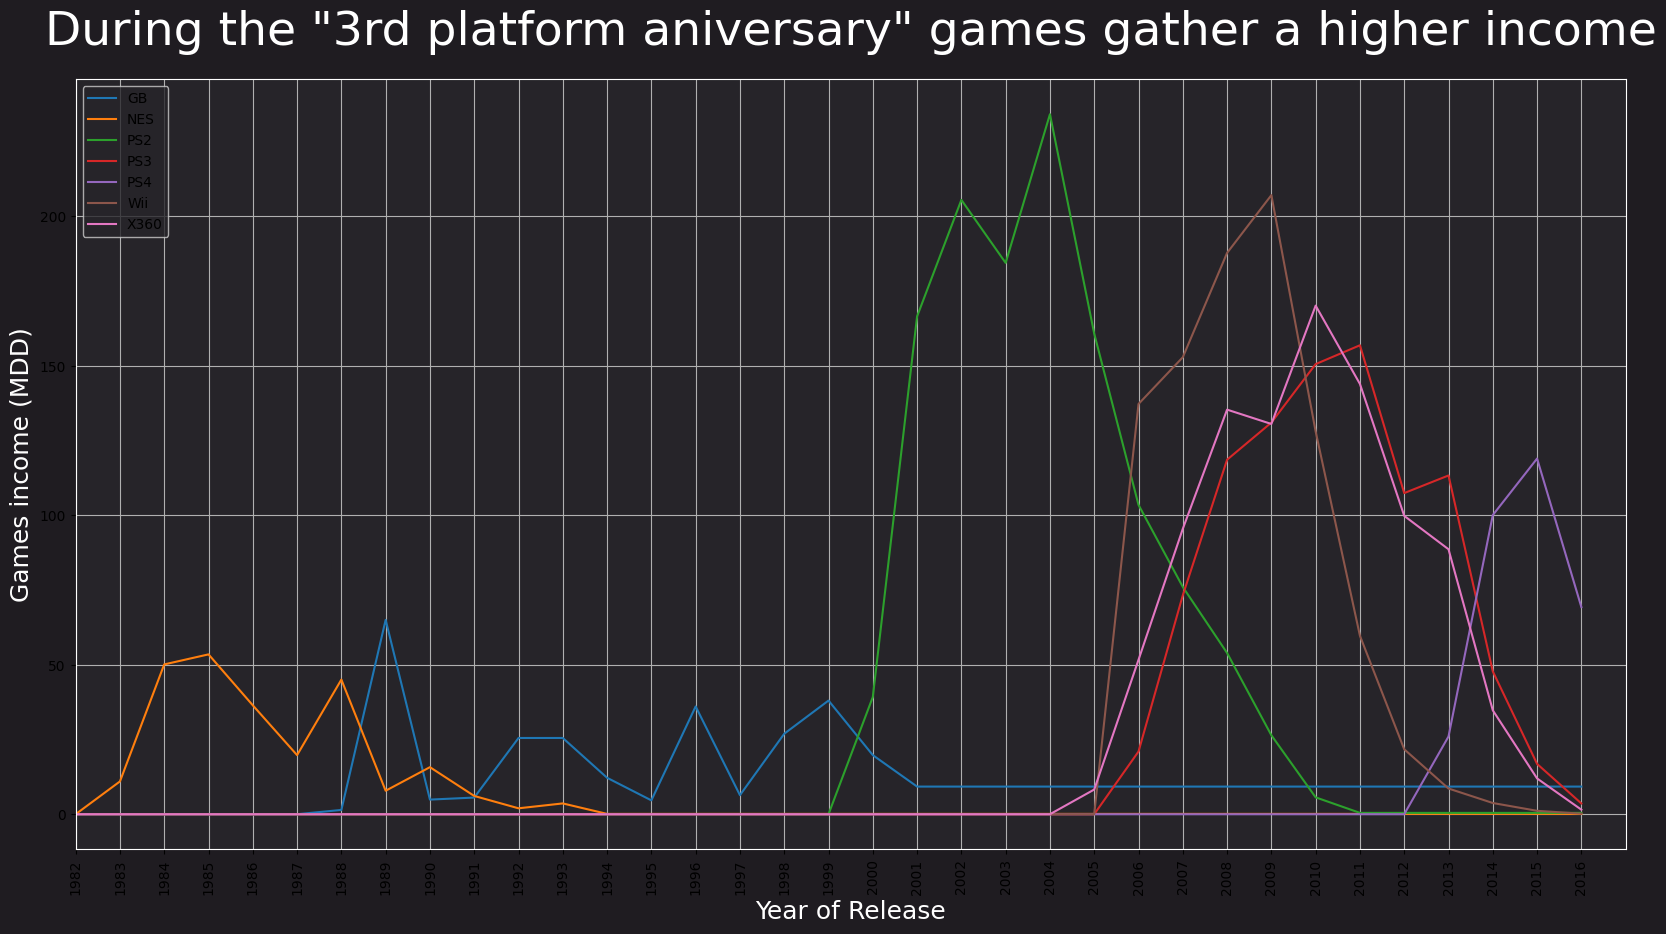

In [37]:
ticks = []
for i in range(37):
    ticks.append(1980 + i)
platform_leaderboard_games.plot(title='During the "3rd platform aniversary" games gather a higher income', rot = 90).set_xticks(ticks=ticks)
plt.xlabel('Year of Release')
plt.ylabel('Games income (MDD)')
plt.legend(loc='upper left')
plt.xlim([1982, 2017])
plt.show()

    Games tend to gather a higher income if they are released during the 3rd aniversary of it platform, but depending on the platform it can vary from 2 to 5 years.
    Also acording to the graph above, in average, platforms keep releasing games for 10 years, but the trend is, new games sell less every year after the 3rd year of the platform, specially after 2000

<h3><b>3.3</b> Determining what Data I should use</h3>

> * Considering the first graph, I think it is a good idea to pick games released from 1994 onward. <br>
> * I don't think it is a good idea to pick games that were released for popular platforms, beacuase that would rule out around 10000 games wich is 2/3 of the whole dataset, this goes could go against the big numbers principle -The more observations are there, the closer it gets to the real propability- and since the objective is try to predict outcomes for next year (a probability), it won't be useful.

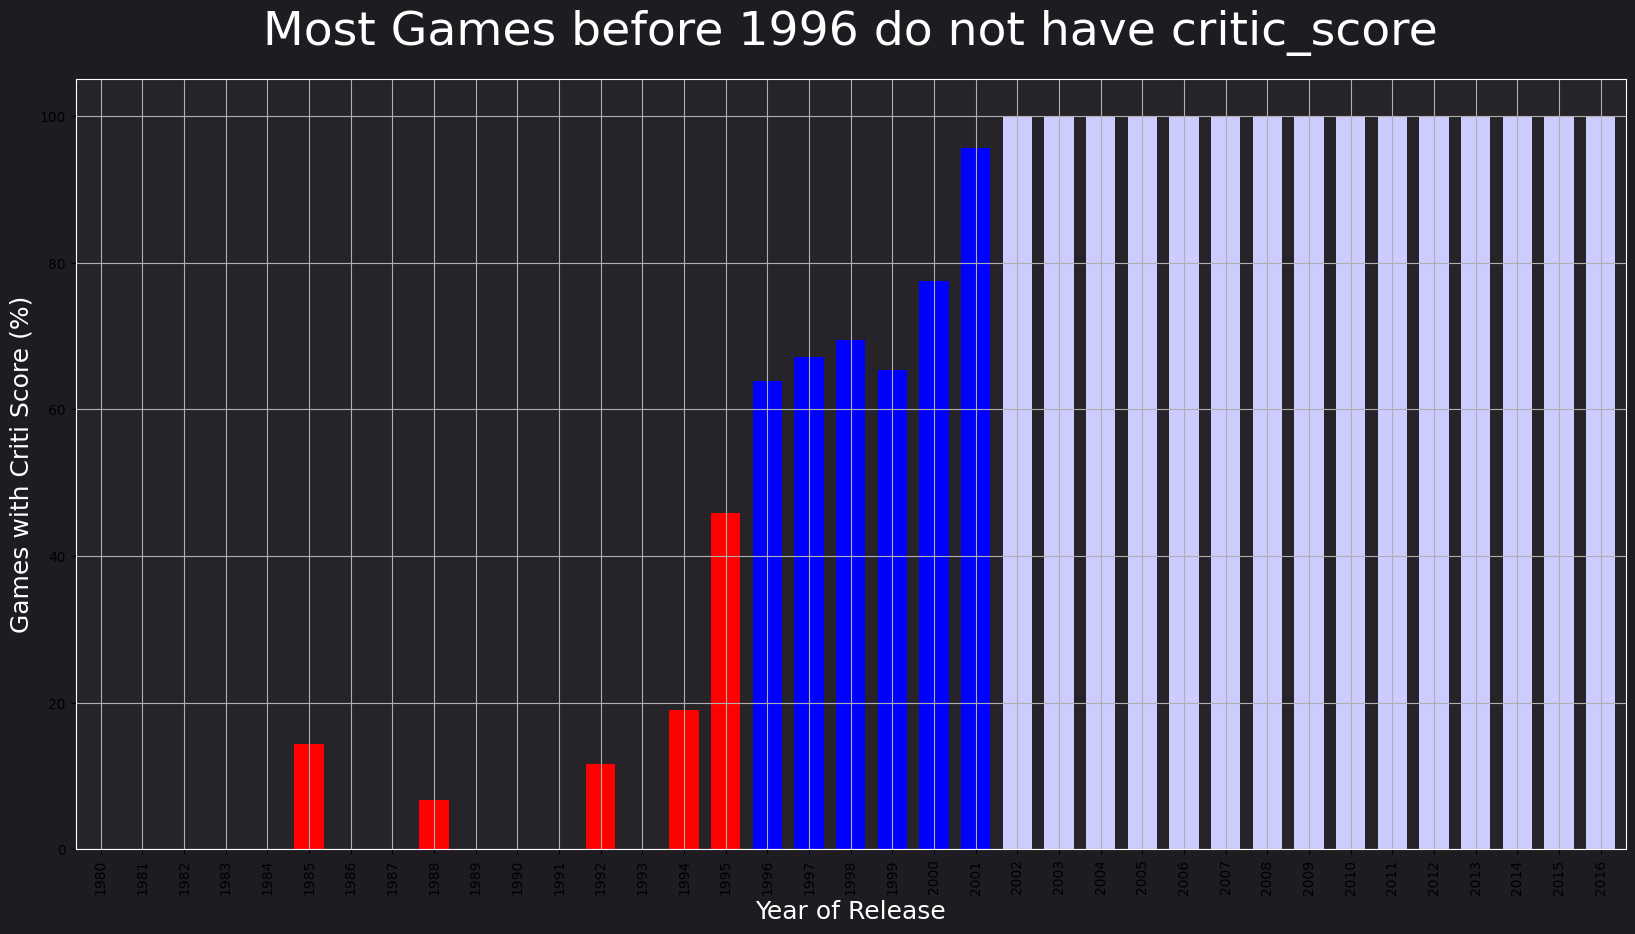

In [38]:
percentage_of_games_with_critic = []
percentage_of_games_with_critic_index = []
for i in range(37):
    year = 1980 + i
    temp = df[(df['year_of_release'] == year)]
    nocs = temp[temp['user_score'] == 0]['user_score'].count()
    count = temp['user_score'].count()
    percentage_of_games_with_critic.append(100 - (nocs / count * 100))
    percentage_of_games_with_critic_index.append(year)
percentage_of_games_with_critic = pd.Series(percentage_of_games_with_critic, index=percentage_of_games_with_critic_index)
percentage_of_games_with_critic.plot(kind='bar', title='Most Games before 1996 do not have critic_score', width=0.7,
                                     color=make_color_list(percentage_of_games_with_critic, 60, 99, ['red', 'blue', (0.8, 0.8, 1)]))
plt.xlabel('Year of Release')
plt.ylabel('Games with Criti Score (%)')
plt.show()

> Since I need to analyze whether the critic score influence sales, i think it is a good idea to pick games released in years where there are more games with a critic than there are without one, so instead of using games from 1994 onward it will be 1996 onward.

<h3><b>3.4</b> Working with relevant data</h3>

<h4><b>3.4.1</b> Filter out irrelevant years</h4>

In [39]:
# keep only games from 1996 onward
relevant_df = df[df['year_of_release'] >= 1996]
relevant_df['platform'] = relevant_df['platform'].cat.remove_unused_categories()

/tmp/ipykernel_624/2463167003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df['platform'] = relevant_df['platform'].cat.remove_unused_categories()


<h4><b>3.4.2</b> Relevant platforms</h4>

the following observations are based on the platform's last years 
(0.2 MDD mean income per game will be used as a Key)

> Last years do not show consistency around 0.2 MDD average per game or more
    
    No Potential ---------> DC, NG, PCFX, SAT, WS

> No more games were released but last years showed consistency around 0.2 MDD average per game OR in some cases the year specify the last year in wich average income per games was around 0.2 MDD
    
    Potential(Until) -----> GB(2001), GBA(2007), GC(2006), N64(2001), PS(2003), PS2(2009), PSP(2010, SNES(1999), XB(2005)

> Shows consistency in the last years around 0.2 MDD per game but the last year was slightly below that 0.2
    
    Risky ----------------> DS, PC PS3, Wii, X360

> Last years show 0.2 MDD per game or more
    
    Potential ------------> 3DS, PS4, PSV, WiiU, XOne

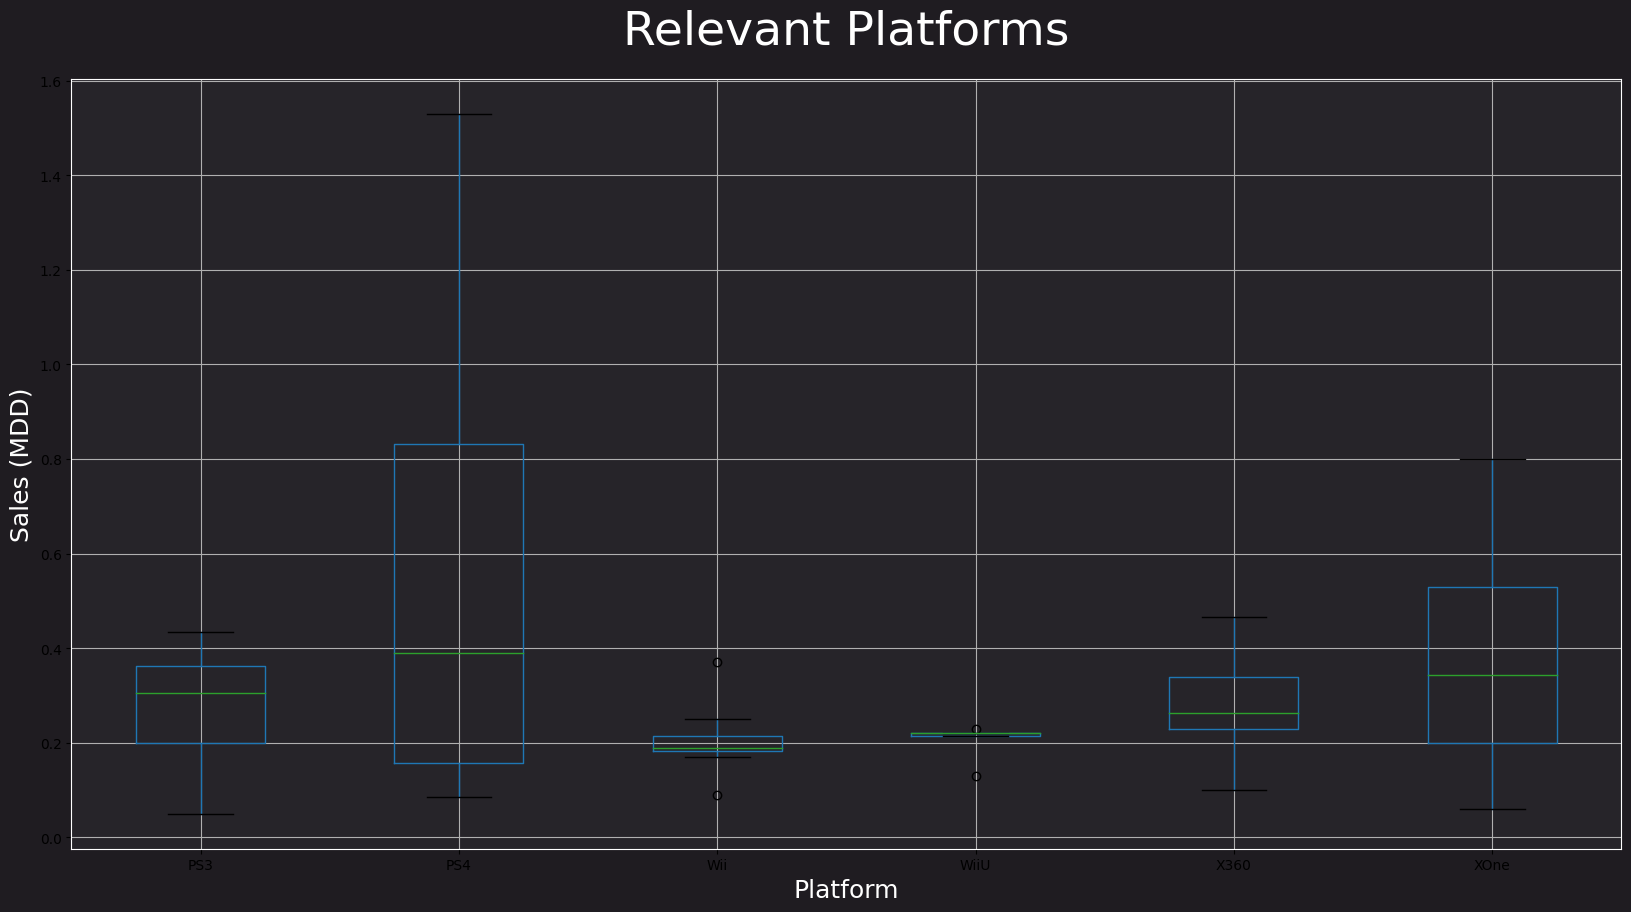

In [40]:
relevant_platforms = pd.pivot_table(relevant_df, index='year_of_release', columns='platform', values='total_sales', aggfunc='median', fill_value=np.NaN)
relevant_platforms = relevant_platforms[['PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne']]
relevant_platforms.plot(kind='box', title='Relevant Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales (MDD)')
plt.show()

    I grabbed these 6 platforms based on the box graph, the line graph and if they continue to release games in 2016.
    Personally I consider PS4, WiiU and XOne as the ones with the most potential since they are new and have made it this good so far.
    PS3, Wii and X360, have been doing good sales for the last 10 years but I do not consider them as the best option since they already have their sucessor and also have been en the marker for around 10 years already.

In [41]:
relevant_platforms = ['PS3', 'PS4', 'Wii', 'WiiU', 'X360', 'XOne']

In [42]:
relevant_df = relevant_df[relevant_df['platform'].isin(relevant_platforms)]
relevant_df['platform'] = relevant_df['platform'].cat.remove_unused_categories()

<h4><b>3.5</b> How critics influence sales</h4>

0.374691052113829


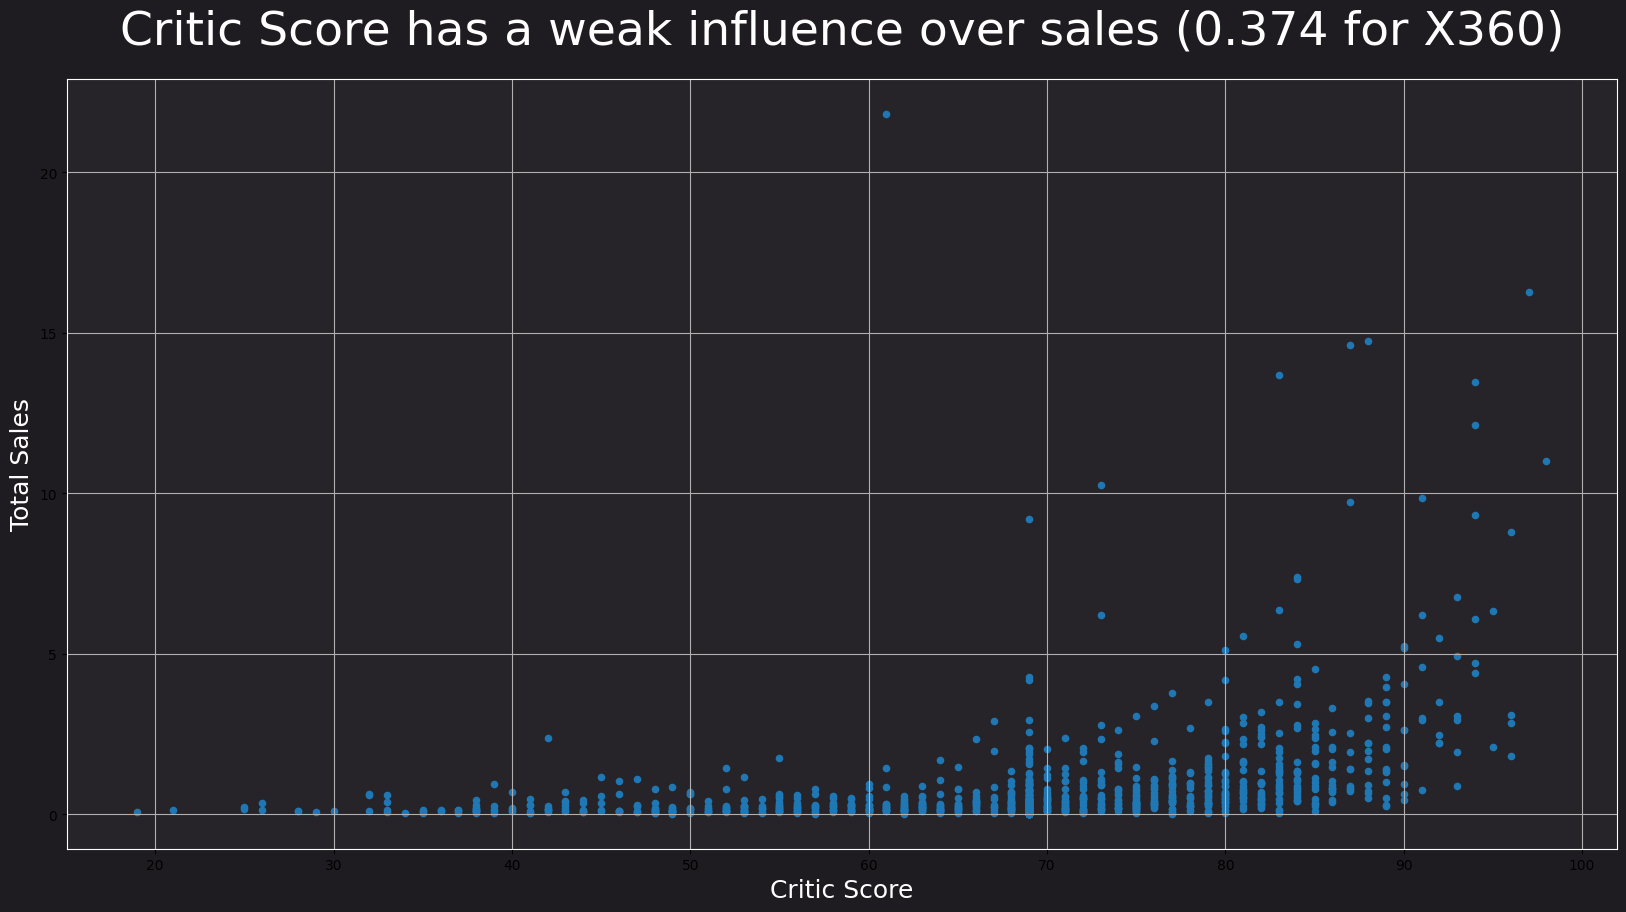

In [43]:
platform = relevant_df[relevant_df['platform'] == 'X360']
platform.plot(kind='scatter', x='critic_score', y='total_sales', title='Critic Score has a weak influence over sales (0.374 for X360)')
print(platform['critic_score'].corr(platform['total_sales']))
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

    It is possible to see that for few games the influence is bigger but in general, critic score has no big influence over global sales, in this particular case critic score and user score correlation with global sales is very small to consider it is influencing sales, since the influence seems bigger from a score of 70, it is possible to say that the score is no the main influence but the game marketing probably is.

    Other platforms show a similar correlation, the platform with the highest correlation is PS3 but still is not strong enough to consider it a Key for the game success.

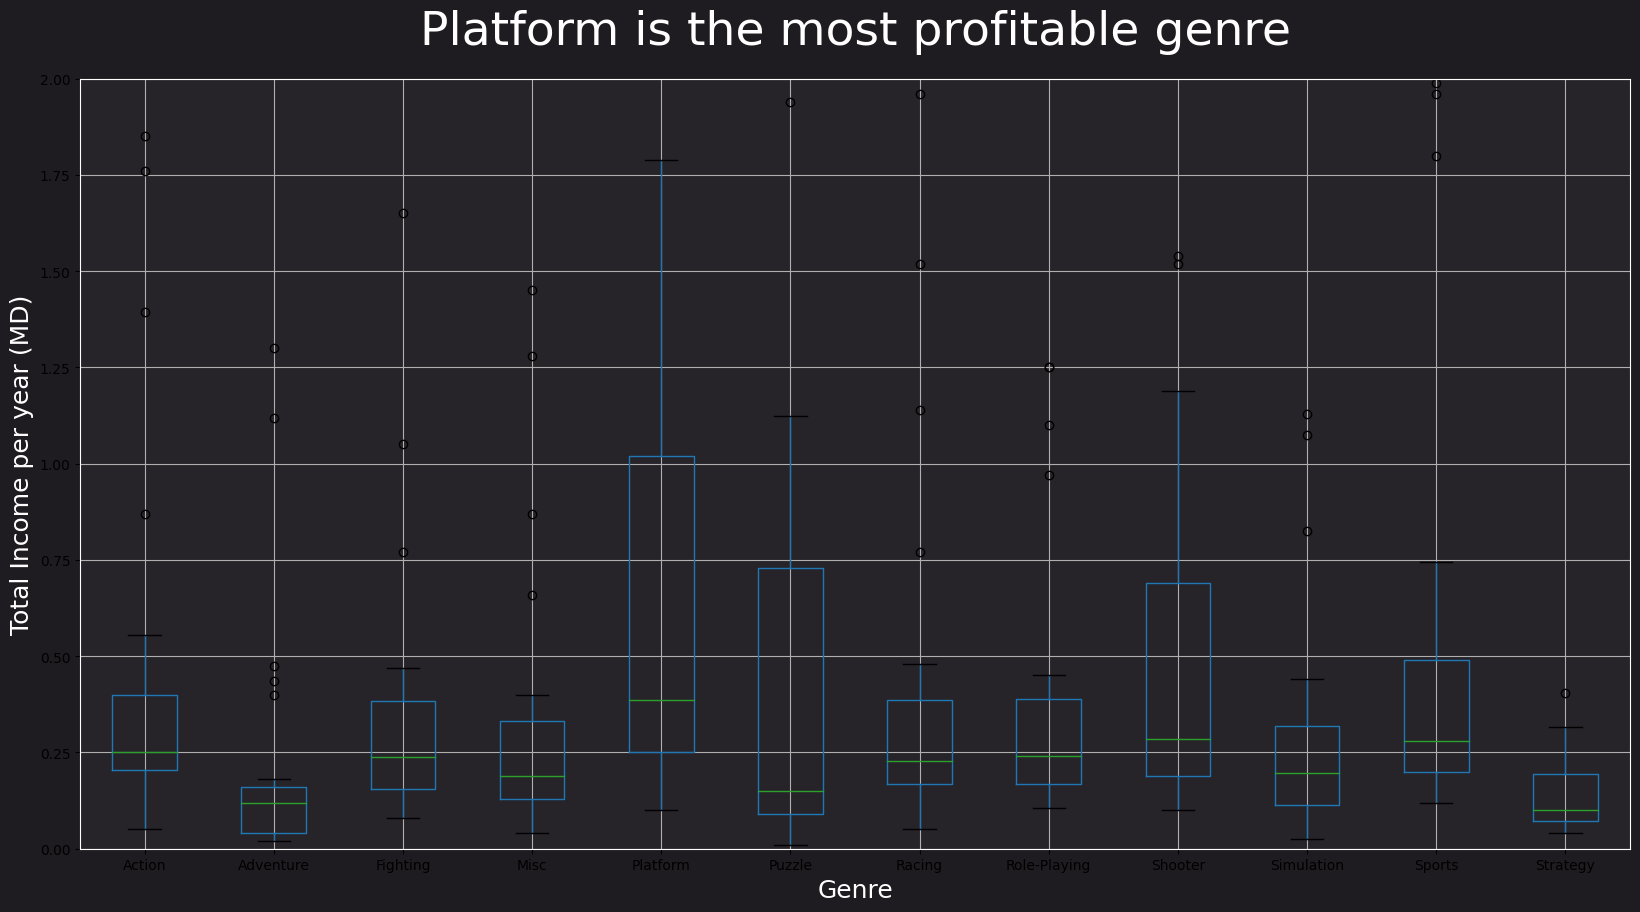

In [44]:
genre_profit = pd.pivot_table(df, index='year_of_release', columns='genre', values='total_sales', aggfunc='median')
genre_profit.plot(kind='box', title='Platform is the most profitable genre')
plt.xlabel('Genre')
plt.ylabel('Total Income per year (MD)')
plt.ylim([0, 2])
plt.show()


    Videogames of the most profitable gender (Platform) often make around 0.325 MD yearly, the minimun colected per year in this genre is close to 0.125 per year, and the maximum is close to 1 MD a year, when the less profitable genre usually makes the minimum Platform genre does.

<h2><b>Step 4</b> - User Profile by Region</h2>

<h3><b>4.1</b> - For every region:</h3>

<h4><b>4.1.1</b> - Top 5 platforms</h4>

> Based on the previous graphs I think the top 5 platforms are:
* PS4
* XOne
* PS3
* X360
* WiiU

<h5>PS4</h5>

In [45]:
relevant_platforms = ['PS3', 'PS4', 'WiiU', 'X360', 'XOne']

/tmp/ipykernel_624/52437205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps4['platform'] = ps4['platform'].cat.remove_unused_categories()


<AxesSubplot:title={'center':"Most platforms' main source of income is North America"}, xlabel='Platform', ylabel='Income (MD)'>

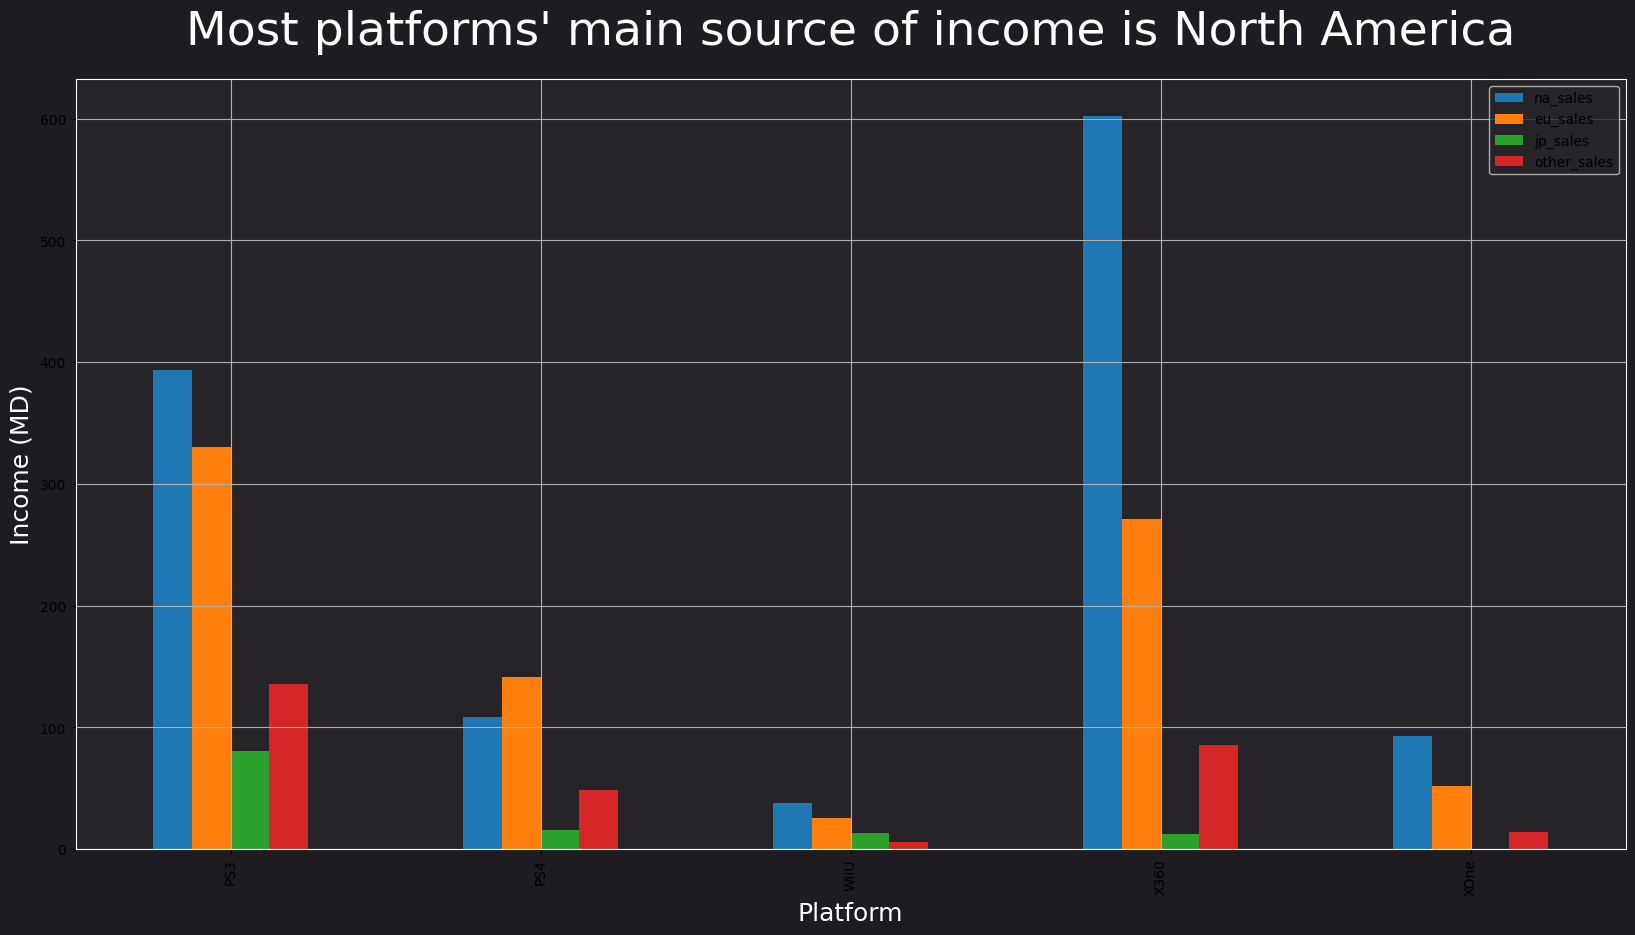

In [46]:
ps4 = df[df['platform'].isin(relevant_platforms)]
ps4['platform'] = ps4['platform'].cat.remove_unused_categories()
ps4 = ps4.groupby(['platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
ps4.plot(kind='bar', title="Most platforms' main source of income is North America",
         xlabel='Platform', ylabel='Income (MD)')

> * Most top 5 platforms' income come from North America, except for PS4.
> * The second then is Europe and the last one is Japan
> * Considering that in the short period of time PS4 has been in the market it already gathered almost a third of what PS3 have made so far, this frame it like a veri promising platfor for the nex year.
> * PS Sells more in Europ
> * X Box sells much more in North America than any other popular platform
> * WiiU is the onlu one platform with more sales in Japan than other regions


<h4><b>4.1.2</b> - Top 5 genres</h4>

    Based on the previous graphs
> Top 5 genres are:
>* Platforms
>* Shooter
>* Sports
>* Action
>* Fighting

<h4><b>4.1.3</b> - ESRB ratings has influence over sales in the different regions?</h4>

rating,E,E10+,T,M
na_sales,1292.99,353.32,759.75,748.48
eu_sales,710.25,188.52,427.03,483.97
jp_sales,198.11,40.20,151.40,64.24
other_sales,234.17,73.56,155.17,177.10


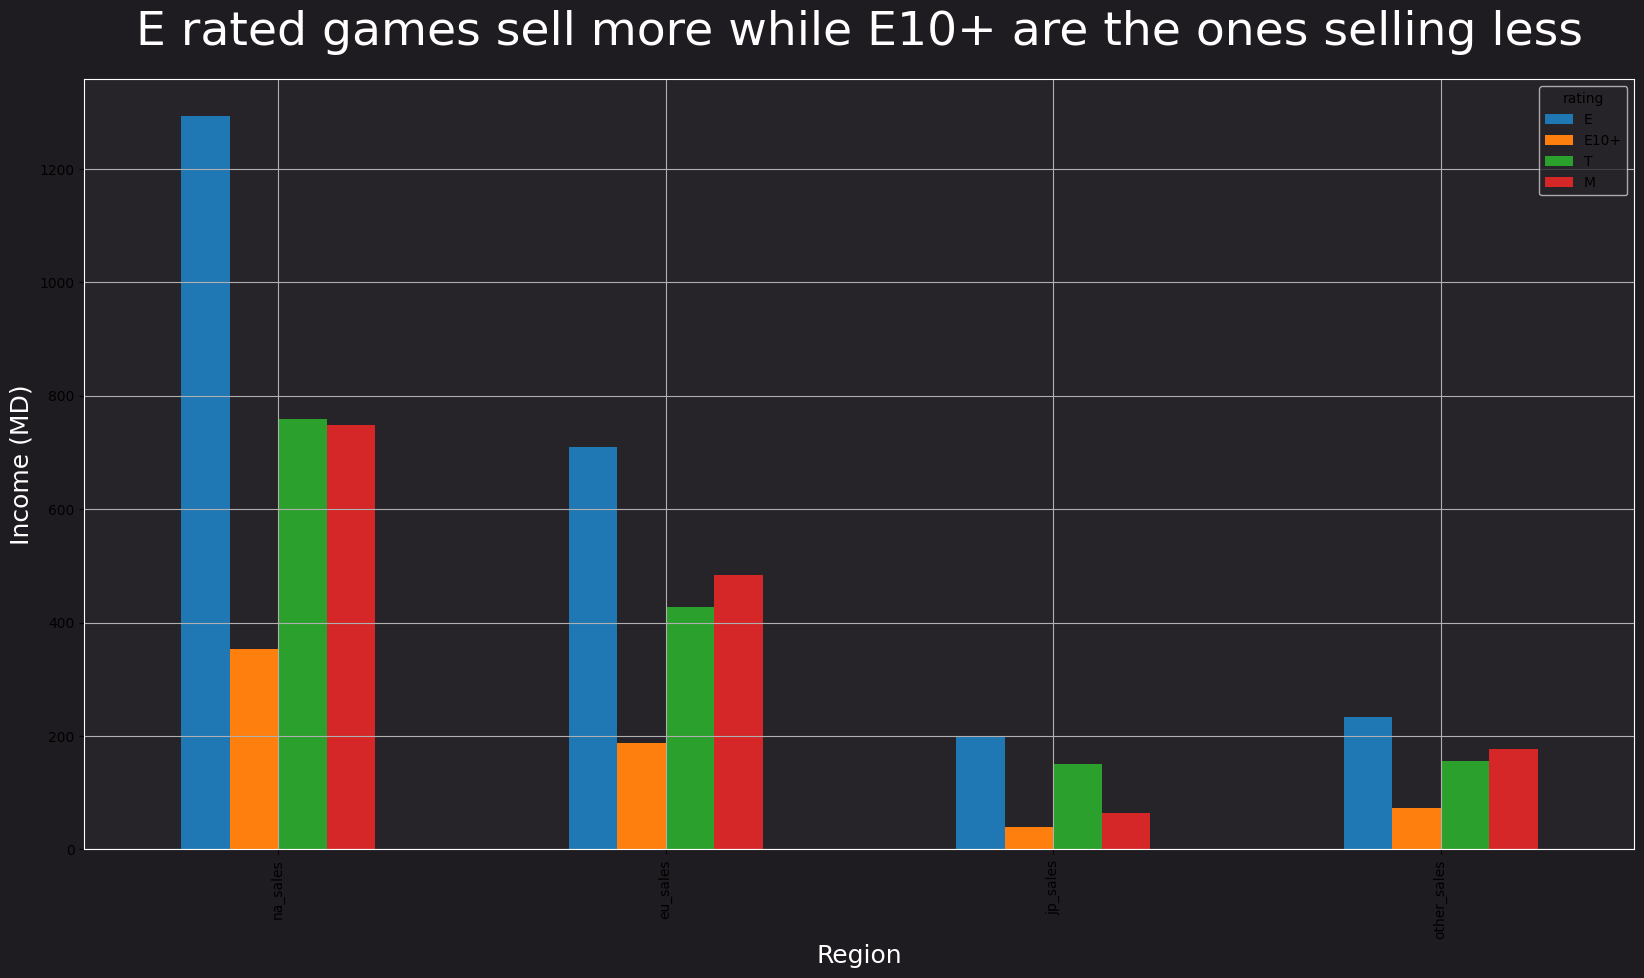

In [47]:
esrb_inf = df[df['rating'].notna()]
esrb_inf = esrb_inf.groupby(['rating'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
esrb_inf = esrb_inf.T
# uncategorized, RP, AO, EC and K-A were removed due to lack of data ()
esrb_inf = esrb_inf[['E', 'E10+',  'T', 'M']]
# esrb_inf = esrb_inf.T
esrb_inf.plot(kind='bar', title="E rated games sell more while E10+ are the ones selling less",
         xlabel='Region', ylabel='Income (MD)')
esrb_inf

    Just by looking at ratings E and E10+ it is possible to see that the first is the that sells more and the second one is the one that sells less, with that said, it is possible to argue that ESRB ratings have an influence over sales that may vary a little according to the region.

<h2><b>Step 5</b> - Hypothesis Tests</h2>

> I'm not sure if the data I have in the dataframe is complete or not since there may be games that were not considered and also, when I was given the data I was told that the data for 2016 may be incomplete, so, it is apropiate to perform hypothesis test instead of just look at the averages of the populations.

> Only the the data is complete the hyphotesis test are not relly that necessary, and this is not the case.

<h3><b>5.1</b> User Average score for Xbox One and PC are the same</h3>

> <b>H<sub>0</sub></b> Average scores for <b>Xbox One</b> and <b>PC</b> are the same<br>
> <b>H<sub>1</sub></b> Average scores for <b>Xbox One</b> and <b>PC</b> are the different

In [48]:
alpha = 0.05

In [49]:
xbx_scores = df[df['platform'] == 'XOne']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']
print('Xbox One:', xbx_scores.mean().round(2), '\tPC:', pc_scores.mean().round(2))

Xbox One: 67.07 	PC: 71.71


In [50]:
print('X Box:', np.var(xbx_scores).round(2), 'PC:', np.var(pc_scores).round(2))

X Box: 153.01 PC: 190.94


In [51]:
# their variances are 153 and 190 so, equal_var should be False
results = st.ttest_ind(xbx_scores, pc_scores, equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject H0")
else:
    print("Can't reject H0")

p-value: 4.498638435829791e-07
Reject H0


    Acording to this test there is 0.000000449% chance of getting the same result if the average were the same, so, with a chance this small it is fair to say we can reject the H0

<h3><b>5.2</b> Average score for genres Action and Sports are the same<h3>

> <b>H<sub>0</sub></b> Average users' scores for <b>Action</b> and <b>Sports</b> are the same<br>
> <b>H<sub>1</sub></b> Average users' scores for <b>Action</b> and <b>Sports</b> are the different

In [52]:
action_scores = df[df['genre'] == 'Action']['user_score']
sports_scores = df[df['genre'] == 'Sports']['user_score']
print('Action:', action_scores.mean().round(2), '\tSports:', sports_scores.mean().round(2))

Action: 66.07 	Sports: 63.0


In [53]:
print('Action:', np.var(action_scores).round(2), 'Sports:', np.var(sports_scores).round(2))

Action: 312.8 Sports: 483.94


In [54]:
# variances are 312 and 483 so, equal_var should be False
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Reject H0")
else:
    print("H0 can't be rejected")

p-value: 2.0843304724247866e-08
Reject H0


    Acording to this test there is practically 0% chances of getting the same result if the averages were the same, so, with a chance this small it is fair to say we can reject the H0

<h3><b>5.3</b> How hypothesis were formulated<h3>

    Both null hypothesis, for step 5.2 and 5.1, were formulated cosidering that there is no difference in the averages for the given series of numbers, and the alternative hypothesis were formulated based on their counterparts stating that there is a difference.

<h3><b>5.4</b> What criteria was used to test the hypothesis and Why?<h3>

    Considering that I had the data as a series of numbers for both populations (Xbox One vs PC and Action vs Sports), I had to perform a test to check it the average of 2 given pupulations were the same.
    I used the typical 5% significance value for it.
    The values come from the same dataset so I considered to check their variances to be able to know if I had to use equal_var as true or false.

<h2><b>Step 6</b> - General Conclusion</h2>

> * Some platforms were very succesful and some others weren't that successful, however, they all provide useful information about the market behabiour, users are more into Platform genre and the platform that seems as the most promising one is PS4, definitelly ESRB ratings have influence in games' global sales with games rated with E being the ones that sells the most and E10+ the ones that sells less.
> * If a studio releases a game that is for PS4 platformer and rated with E should be succesfull, unless the studio executes the idea poorly.
> * But a game with all these characteristics is not the only recipe for success in the videogame market nowadays, there are other promising platforms, and other good genres out there as well as other ratings with good sales.
> * There are 3 Platform leaders that studios should look at if they want to gain exposure, Play Station 4 , X Box One and WiiU, this is because their respective predecessors have a long history of good sales wich means a market relying on ther popularity.
> If the game is looking to make money they should create a Platformer game for Everyonr (E) since these are the main responsibles of gathering sales.